## ログファイルをCSVに変換

このスクリプトはログファイルをCSVに変換するためのものです。
`LOG_FILE_PATH`にログファイルのパスを入力してください。

In [2]:
# ここにログファイルのパスを入力
LOG_FILE_PATH = 'l4_100ohm_215us_500V.log'

次に、JupyterLabの実行ボタン「▶▶」を押してください。

In [19]:
import re

CSV_FILE_PATH = LOG_FILE_PATH + '.csv'

# ログファイルを開く
with open(LOG_FILE_PATH, 'r') as f:
    # 各行を配列に変換
    l = [s.rstrip() for s in f.readlines()]
    # 「<数字>,」の繰り返しパターンを見つけて取り出す
    datum = list(filter(lambda ll : re.match('([0-9]+,)+', ll), l))
    # 行の最後のカンマは不要なので消す
    datum = [d.rstrip(',') for d in datum]
    # テキストを配列に変換
    array_datum = [[int(s) for s in data.split(',')] for data in datum]
    # データを１列に整列
    sorted_data = []
    for i in range(len(array_datum[0])):
        for j in range(len(array_datum)):
            sorted_data.append(str(array_datum[j][i]))
    # CSVファイルに書き出し
    csv = ','.join(sorted_data)
    with open(CSV_FILE_PATH, 'w') as f_csv:
        f_csv.write(csv)

## CSVをグラフ描画

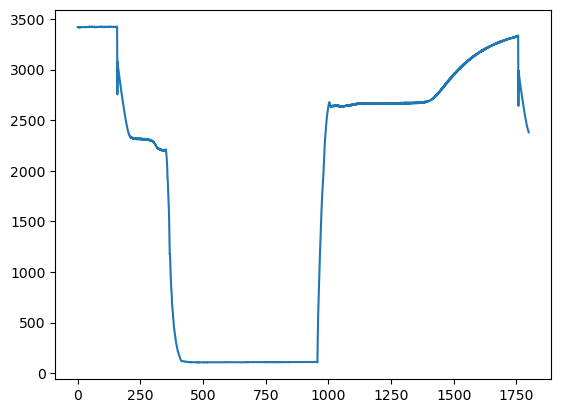

In [20]:
from matplotlib import pyplot as pyplot

# CSVに保存された値を数値として読み込み
with open(CSV_FILE_PATH, 'r') as f:
    # １行読み出す
    l = f.readline()
    # カンマ区切りの文字列を数値の配列に変換
    y = [int(s) for s in l.split(',')]
    # グラフを描画
    pyplot.plot(y)